In [81]:
dataset = pd.read_excel("EIR.xlsx")
df = pd.DataFrame(dataset)

In [82]:
df.head()

,CREATED_DATE,CREATED_DATE minus Hour,USER_ID,TRANSACTION_ID,TYPE,CURRENCY,AMOUNT
0,2016-01-09 00:18:14,2016-09-01 00:00:00,45e3c222-38ac-4fdb-b092-ff1639e4438c,27d7fd11-d885-4d2c-9ed1-daa89b7bda1d,TOPUP,EUR,177.38
1,2016-01-09 02:28:34,2016-09-01 00:00:00,57c11728-b979-4856-bada-1d268726cfe9,2e1ee26c-0d24-4931-a7f9-0caa0d07eb2e,BANK_TRANSFER,EUR,310.27
2,2016-01-09 04:00:34,2016-09-01 00:00:00,1319cca9-02a7-4a15-8abb-48d4e08e5aa3,bfd20e6f-ddb3-4237-bcd2-f7f8d967e36e,CARD_PAYMENT,EUR,96.44
3,2016-01-09 10:26:27,2016-09-01 00:00:00,3f6bb28c-f945-4027-9178-747956c3ea58,85037186-039a-4ae5-9fea-e87f30822218,BANK_TRANSFER,EUR,288.51
4,2016-01-09 11:37:59,2016-09-01 00:00:00,f54baeeb-7282-4d23-9bb7-e8396ce1b159,8e1e938a-1916-4d5e-b261-82c61a6979d6,CARD_PAYMENT,GBP,88.45


In [110]:
df['TYPE'].unique()

array(['TOPUP', 'BANK_TRANSFER', 'CARD_PAYMENT', 'ATM', 'P2P_TRANSFER'],
      dtype=object)

In [111]:
df['CURRENCY'].unique()

array(['EUR', 'GBP'], dtype=object)

In [83]:
df.shape

(10000, 7)

In [85]:
df.columns.value_counts()

CREATED_DATE               1
CREATED_DATE minus Hour    1
USER_ID                    1
TRANSACTION_ID             1
TYPE                       1
CURRENCY                   1
AMOUNT                     1
dtype: int64

In [98]:
top_users = df['USER_ID'].value_counts().nlargest(3)
print(top_users)

06bb2d68-bf61-4030-8447-9de64d3ce490    132
d35f19f3-d9ad-48bf-bd1e-90f3ba4f0b98    103
d1bc3cd6-154e-479f-8957-a69cdf414462     95
Name: USER_ID, dtype: int64


In [99]:
transaction_value_by_top_users = df[df['USER_ID'].isin(top_users.index)]['AMOUNT'].sum()
print("transaction_value_by_top_users",transaction_value_by_top_users)

transaction_value_by_top_users 57087.91


In [100]:
user_concentration = top_users.sum() / total_transactions * 100
print("user_concentration",user_concentration)

user_concentration 3.3000000000000003


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns


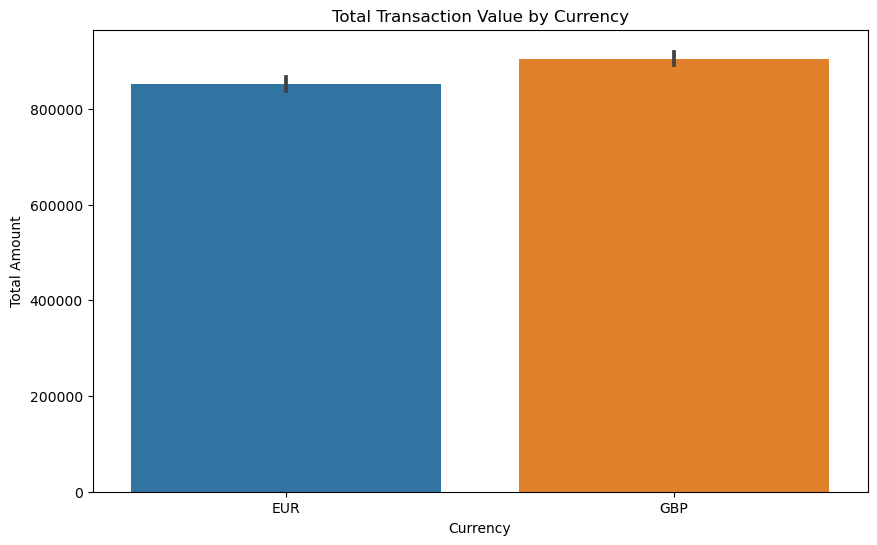

In [106]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CURRENCY', y='AMOUNT', data=df, estimator=sum)
plt.title('Total Transaction Value by Currency')
plt.ylabel('Total Amount')
plt.xlabel('Currency')
plt.show()



In [151]:
currency_usage = df.groupby('CURRENCY')['AMOUNT'].sum()
currency_usage

CURRENCY
EUR    852363.35
GBP    905319.18
Name: AMOUNT, dtype: float64

In [153]:
average_transaction_amount = df.groupby('CURRENCY')['AMOUNT'].mean() # Average Transaction Amount by Currency
average_transaction_amount

CURRENCY
EUR    175.708792
GBP    175.824273
Name: AMOUNT, dtype: float64

In [164]:
from scipy.stats import ttest_ind

data_eur = df[df['CURRENCY'] == 'EUR']['AMOUNT']
data_gbp = df[df['CURRENCY'] == 'GBP']['AMOUNT']

t_statistic, p_value = ttest_ind(data_eur, data_gbp)

# Set the significance level
alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in average transaction amount between EUR and GBP.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in average transaction amount between EUR and GBP.")

Fail to reject null hypothesis: There is no significant difference in average transaction amount between EUR and GBP.


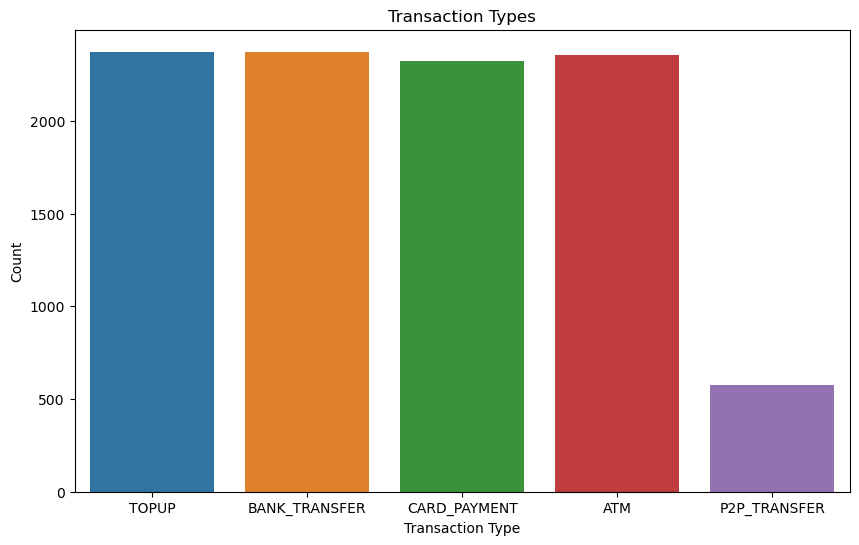

In [107]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TYPE', data=df)
plt.title('Transaction Types')
plt.ylabel('Count')
plt.xlabel('Transaction Type')
plt.show()


In [143]:
activity_distribution = df['TYPE'].value_counts()
activity_distribution

TOPUP            2373
BANK_TRANSFER    2371
ATM              2357
CARD_PAYMENT     2325
P2P_TRANSFER      574
Name: TYPE, dtype: int64

In [139]:


duplicate_user_id_count = df.duplicated(subset='USER_ID').sum()

print("Count of Duplicate User IDs:", duplicate_user_id_count)


Count of Duplicate User IDs: 8866


In [134]:
user_id_counts = df['USER_ID'].value_counts()
user_id_counts


06bb2d68-bf61-4030-8447-9de64d3ce490    132
d35f19f3-d9ad-48bf-bd1e-90f3ba4f0b98    103
d1bc3cd6-154e-479f-8957-a69cdf414462     95
0fe472c9-cf3e-4e43-90f3-a0cfb6a4f1f0     85
65ac0928-e17d-4636-96f4-ebe6bdb9c98d     84
                                       ... 
a36c529f-7819-416f-8a5c-42ac6b787e3d      1
462af64f-8cf4-48b2-bc3b-854eb9baa8d9      1
524314c9-55bc-42e0-908e-76a76a117f27      1
3ed84310-bebe-4395-a0b6-eebf8ca308da      1
2d518cf9-d853-443d-a3d8-bda56f373901      1
Name: USER_ID, Length: 1134, dtype: int64

Text(0, 0.5, 'Count')

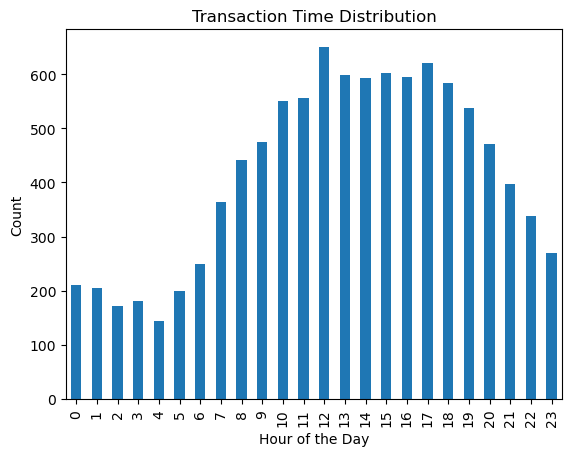

In [149]:
df['CREATED_DATE'] = pd.to_datetime(df['CREATED_DATE'])
transaction_time_distribution = df['CREATED_DATE'].dt.hour.value_counts().sort_index()
transaction_time_distribution.plot(kind='bar', title='Transaction Time Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')


In [174]:
# Convert 'CREATED_DATE' column to datetime
df['CREATED_DATE'] = pd.to_datetime(df['CREATED_DATE'])

# Calculate time differences between transactions
df['TimeDifference'] = df['CREATED_DATE'].diff().dt.total_seconds()

time_threshold = 3600  # Threshold in seconds for time gaps

long_time_gaps = df[df['TimeDifference'] > time_threshold]

print("Number of Long Time Gaps:", len(long_time_gaps))

num_long_time_gaps = len(long_time_gaps)




Number of Long Time Gaps: 2528


In [169]:
short_time_threshold = 60  # Threshold in seconds for short time gaps
short_time_transactions = df[df['TimeDifference'] < short_time_threshold]

print("Number of Short Time Transactions:", len(short_time_transactions))


Number of Short Time Transactions: 429


In [175]:
# Calculate the total number of transactions
total_transactions = len(df)

# Calculate the percentage of long time gap transactions
percentage_long_time_gaps = (num_long_time_gaps / total_transactions) * 100

print("Percentage of Long Time Gap Transactions:", round(percentage_long_time_gaps, 2), "%")


Percentage of Long Time Gap Transactions: 25.28 %


In [162]:
total_users = len(user_transaction_counts)

# Calculate the percentage of users with low engagement (i.e below median transaction count)
median_transaction_count = user_transaction_counts.median()
low_engagement_users = user_transaction_counts[user_transaction_counts <= median_transaction_count]
low_engagement_percentage = (len(low_engagement_users) / total_users) * 100

# Calculate the percentage of users with high engagement (i.e above median transaction count)
high_engagement_users = user_transaction_counts[user_transaction_counts > median_transaction_count]
high_engagement_percentage = (len(high_engagement_users) / total_users) * 100

print(f"Percentage of users with low engagement: {low_engagement_percentage:.2f}%")
print(f"Percentage of users with high engagement: {high_engagement_percentage:.2f}%")

Percentage of users with low engagement: 54.76%
Percentage of users with high engagement: 45.24%
